<h1>Prova 1 - Introdução à Ciência dos Dados</h1>
<h3>Daniel Freitas Martins - 2304</h3>

In [133]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import percentileofscore
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import operator

In [2]:
def analisarAmostraPopulacao(populacao, amostra, limiar=0.05):
    print("\t\t\t Amostra "+str(i))
    
    media_populacao=populacao.mean()
    media_amostra=np.mean(amostra)
    erro_padrao=populacao.std() / np.sqrt(len(amostra))
    z_score = abs(media_amostra - media_populacao) / erro_padrao
    valor_p = 2*st.norm.sf(abs(z_score))
    
    print("Média População: %.3f" % (media_populacao))
    print("Média Amostra: ",(media_amostra))
    print("Erro Padrão:"+str(erro_padrao))
    print("A diferença entre a média da amostra e da população é de %.3f erros padrões." % (z_score))
    print("Valor-p: %.10f" % (valor_p))
    
    if(valor_p < limiar):
        print("Provavelmente a Amostra NÃO veio da População.")
    else:
        print("Provavelmente a Amostra VEIO da População.")
        
    print("\n\n")


In [14]:
def lerCSV(caminho_arquivo, header):
    return pd.read_csv(caminho_arquivo, index_col=False, header=header, squeeze=True)

In [3]:
def analisarDuasAmostras(amostra_1, amostra_2):
    amostras = []
    amostras.append(amostra_1)
    amostras.append(amostra_2)
    print('Média amostra 1:         %.2f' % (np.mean(amostra_1)))
    print('Desvio padrão amostra 1: %.2f\n' % (np.std(amostra_1)))
    print('Média amostra 2:         %.2f' % (np.mean(amostra_2)))
    print('Desvio padrão amostra 2: %.2f\n' % (np.std(amostra_2)))
    print('Média de ambas as amostras:         %.2f' % (np.mean(amostras)))
    print('Desvio padrão de ambas as amostras: %.2f' % (np.std(amostras)))
    plt.hist(amostras, 100, density=True, align='mid')
    plt.show()

In [4]:
def getIntervaloConfianca95(data):
    # 95% intervalo confiança
    mean=data.mean()
    sd=data.std()
    n=len(data)
    std_error=sd/np.sqrt(n)
    print("Erro padrao %.3f " % std_error)
    print("Intervalo de confiança: %.3f - %.3f " % ((mean-(1.96*std_error)),(mean+(1.96*std_error))))    
    return mean,1.96*std_error

In [6]:
def getNumeroErrosPadroesDiferencaMedias(data1, data2): #str_error_diff_mean
    mean1=data1.mean()
    mean2=data2.mean()
    std1=data1.std()
    std2=data2.std()
    n1=len(data1)
    n2=len(data2)
    std_error_diff=np.sqrt((np.power(std1,2)/n1) + (np.power(std2,2)/n2))
    diff_mean=mean1-mean2
    print("Diferencas das medias: %.3f " % diff_mean)
    print("Erro padrão: %.3f " % std_error_diff)
    return (diff_mean/std_error_diff)

In [7]:
def gerarErrorBar(data_1, data_2, titulo_data_1 = 'data1', titulo_data_2 = 'data2'):
    mean_data_1,std_error_data_1=confidence_interval(data1)
    mean_data_2,std_error_data_2=confidence_interval(data2)
    x = [mean_data_1, mean_data_2]
    y = [1, 3]
    errors = [std_error_data_1, std_error_data_2]
    plt.figure()
    plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
    plt.yticks((0, 1, 3, 4), ('', titulo_data_1, titulo_data_2,'')) 
    plt.show()

In [8]:
def gerarHistogramaDuasAmostras(amostra_1, amostra_2):
    amostras = []
    amostras.append(amostra_1)
    amostras.append(amostra_2)
    plt.hist(amostras, 100, density=True, align='mid', color=['b', 'r'])
    plt.show()

<h2>Lendo dados de "Filmes-Prova01.csv", correspondentes a lista de filmes de quatro plataformas de <i>Streaming</i> (Netflix, Amazon Prime, Disney+ e Hulu)</h2>

In [15]:
df = lerCSV("Filmes-Prova01.csv", header=0)
df.head(3)

,ID,Titulo,Ano,Classificacao_etaria,IMDb,Netflix,Hulu,Amazon_prime,Disney+,Diretores,Generos,Pais,Idioma,Duracao_min
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


<h2>1) Quantos filmes cada uma das 4 plataformas possui? Faça um gráfico de barras para ilustrar esses valores</h2>

Quantidade de filmes em cada plataforma:
	- Netflix: 3560
	- Hulu: 903
	- Amazon Prime: 12354
	- Disney+: 564


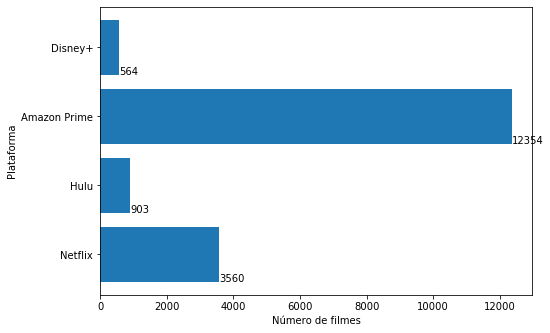

In [95]:
qtd_filmes_netflix = df['Netflix'].sum()
qtd_filmes_hulu = df['Hulu'].sum()
qtd_filmes_amazon = df['Amazon_prime'].sum()
qtd_filmes_disney = df['Disney+'].sum()
print("Quantidade de filmes em cada plataforma:")
print("\t- Netflix:", qtd_filmes_netflix)
print("\t- Hulu:", qtd_filmes_hulu)
print("\t- Amazon Prime:", qtd_filmes_amazon)
print("\t- Disney+:", qtd_filmes_disney)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plataformas = ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+']
qtd_filmes_plataformas = [qtd_filmes_netflix, qtd_filmes_hulu,
                         qtd_filmes_amazon, qtd_filmes_disney]
ax.barh(plataformas, qtd_filmes_plataformas)
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width()+5,p.get_y()))
ax.set_ylabel('Plataforma')
ax.set_xlabel('Número de filmes')
plt.show()

<h2>2) Quantos filmes estão em mais de uma plataforma?</h2>

In [47]:
qtd = 0
for index, row in df.iterrows(): # iterando sobre todas as linhas
    if(row['Netflix'] == 1): # se tiver em Netflix, avaliar se tem para algum outro
        if(row['Hulu'] == 1 or row['Amazon_prime'] == 1 or row['Disney+'] == 1):
            qtd+=1 # se tiver para Netflix e algum outro, soma 1
            continue # vá para a próxima linha
    if(row['Hulu'] == 1): # se tiver em Hulu, já sabemos que não tem em Netflix
        if(row['Amazon_prime'] == 1 or row['Disney+'] == 1): # avaliando para os restantes
            qtd+=1 # Analogamente, soma-se 1 se tiver para Hulu e outra plataforma
            continue
    if(row['Amazon_prime'] == 1):
        if(row['Disney+'] == 1):
            qtd+=1
            continue
print("Nº de filmes que estão em mais de uma plataforma:", qtd)

Nº de filmes que estão em mais de uma plataforma: 627


<h2>3) Qual a plataforma que possui a maior média de nota IMDb?</h2>

In [37]:
df_filmes_netflix = df[df['Netflix'] == 1]
df_filmes_hulu = df[df['Hulu'] == 1]
df_filmes_amazon = df[df['Amazon_prime'] == 1]
df_filmes_disney = df[df['Disney+'] == 1]

In [61]:
def calcularMediaIMDb(df, nome_plataforma):
    media = df['IMDb'].sum() / len(df)
    print('Média de nota IMDb da plataforma', nome_plataforma, "=", media)
    return media

In [142]:
media_netflix = calcularMediaIMDb(df_filmes_netflix, 'Netflix')
media_hulu = calcularMediaIMDb(df_filmes_hulu, 'Hulu')
media_amazon = calcularMediaIMDb(df_filmes_amazon, 'Amazon Prime')
media_disney = calcularMediaIMDb(df_filmes_disney, 'Disney+')

v = {'Netflix': media_netflix, 'Hulu': media_hulu, 'Amazon Prime': media_amazon, 'Disney+': media_disney}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print("\nA plataforma que possui maior média de nota IMDb é a %s, com uma média de aproximadamente %.2f."%(nome_plat, v[nome_plat]))

Média de nota IMDb da plataforma Netflix = 6.04570224719101
Média de nota IMDb da plataforma Hulu = 6.063344407530454
Média de nota IMDb da plataforma Amazon Prime = 5.562570827262425
Média de nota IMDb da plataforma Disney+ = 6.429964539007092

A plataforma que possui maior média de nota IMDb é a Disney+, com uma média de aproximadamente 6.43.


<h2>4) Qual o percentual de filmes de cada plataforma com nota IMDb maior que 8?</h2>

In [87]:
def calcularPercentualNotaIMDb(df, nome_plataforma, limiar=8):
    qtd = 0
    for index, row in df.iterrows():
        if(row['IMDb'] > 8):
            qtd+=1
    percentual = qtd/len(df)*100
    print('\t-', nome_plataforma, "= {:.2f}%".format(percentual))
    return percentual

In [135]:
print('Percentual de filmes de cada plataforma com nota IMDb maior que 8:')
pnet = calcularPercentualNotaIMDb(df_filmes_netflix, "Netflix")
phul = calcularPercentualNotaIMDb(df_filmes_hulu, "Hulu")
pama = calcularPercentualNotaIMDb(df_filmes_amazon, "Amazon Prime")
pdis = calcularPercentualNotaIMDb(df_filmes_disney, "Disney+")

v = {'Netflix': pnet, 'Hulu': phul, 'Amazon Prime': pama, 'Disney+': pdis}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print(nome_plat, 'possui um maior percentual de filmes com nota IMDb maior que 8')

Percentual de filmes de cada plataforma com nota IMDb maior que 8:
	- Netflix = 3.62%
	- Hulu = 2.55%
	- Amazon Prime = 2.62%
	- Disney+ = 3.72%
Disney+ possui um maior percentual de filmes com nota IMDb maior que 8


<h2>5) Se uma pessoa é uma apreciadora de filmes clássicos antigos, qual plataforma você mais recomenda? Justifique.</h2>

In [94]:
df_antigos = df[df['Ano'] <= 1990]
qtd_antigos_netflix = df_antigos['Netflix'].sum()
qtd_antigos_hulu = df_antigos['Hulu'].sum()
qtd_antigos_amazon = df_antigos['Amazon_prime'].sum()
qtd_antigos_disney = df_antigos['Disney+'].sum()
print("Nº filmes antigos Netflix:", qtd_antigos_netflix)
print("Nº filmes antigos Hulu:", qtd_antigos_hulu)
print("Nº filmes antigos Amazon Prime:", qtd_antigos_amazon)
print("Nº filmes antigos Disney+:", qtd_antigos_disney)

Nº filmes antigos Netflix: 123
Nº filmes antigos Hulu: 52
Nº filmes antigos Amazon Prime: 2881
Nº filmes antigos Disney+: 133


<p>Considerando-se que os filmes antigos clássicos estão abaixo do ano de 1990 (inclusive), eu recomendaria a plataforma <b>Amazon Prime</b> por possuir um maior número de filmes antigos. Em comparação com Disney+, a Amazon Prime possui 20 vezes mais filmes antigos disponíveis para escolha.</p>

<h2>6) Quantas categorias de classificação etária existem? Faça um gráfico de barras com a quantidade de filmes por classificação etária.</h2>

In [121]:
df_classificacao_unique = df['Classificacao_etaria'].unique
df_classificacao_unique

<bound method Series.unique of 0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Classificacao_etaria, Length: 16744, dtype: object>

<p>Note que existem valores <b>NaN</b>. No entanto, vou considerar para ver também a quantidade de filmes que não possuem a classificação etária informada...</p>

In [163]:
#df_classificacao_unique = df['Classificacao_etaria'].dropna().unique()
df_classificacao_unique = df['Classificacao_etaria'].unique()
df_classificacao_unique

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [162]:
qtd_categorias_classificacao_etaria = len(df_classificacao_unique)
print('- Existem', (qtd_categorias_classificacao_etaria-(1 if pd.isnull(df_classificacao_unique).any() else 0)), 
      'categorias de classificação etária diferentes nesta base de dados.\n')
print('- Existem filmes em que a categoria de classificação etária está ausente, como visto acima.')

- Existem 5 categorias de classificação etária diferentes nesta base de dados.

- Existem filmes em que a categoria de classificação etária está ausente, como visto acima.


In [190]:
dict_somas = dict((el if el is not np.nan else 'Não informado',0) for el in df_classificacao_unique)
for index, row in df.iterrows():
    dict_somas[row['Classificacao_etaria'] if row['Classificacao_etaria'] is not np.nan else 'Não informado'] += 1
dict_somas

{'13+': 1255,
 '18+': 3474,
 '7+': 1462,
 'Não informado': 9390,
 'all': 843,
 '16+': 320}

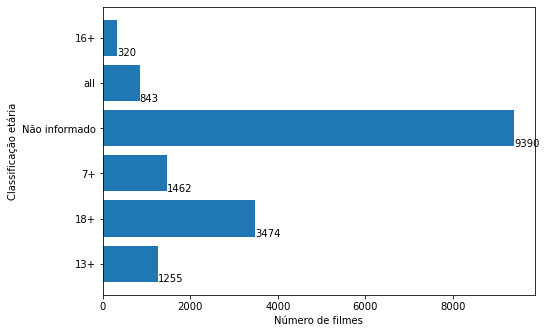

In [191]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
classificacoes_etarias = list(dict_somas)
qtd_filmes = list(dict_somas.values())
ax.barh(classificacoes_etarias, qtd_filmes)
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width()+5,p.get_y()))
ax.set_ylabel('Classificação etária')
ax.set_xlabel('Número de filmes')
plt.show()

<p>Note que existe um número muito grande de filmes em que a classificação indicativa não está disponível. Isso pode ser um empecilho na hora de escolher determinados filmes para assistir com toda a família, por exemplo. Das cinco categorias, existem mais filmes adultos (18+) do que os demais.</p>